In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("D:\\Ameng\\Data Science Project\\house-prices-prediction\\data\\processed\\cleaned_train.csv")
test_df = pd.read_csv("D:\\Ameng\\Data Science Project\\house-prices-prediction\\data\\processed\\cleaned_test.csv")

## Feature Engineering

In [3]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

In [4]:
train_df['HouseRemodelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['HouseRemodelAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [5]:
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [6]:
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['TotalArea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [7]:
train_df['TotalBaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['TotalBaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])

In [8]:
train_df['TotalPorchSF'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch']
test_df['TotalPorchSF'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch']

### Delete column that no need

In [9]:
train_df = train_df.drop(columns=['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 
                                  'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])
test_df = test_df.drop(columns=['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 
                                  'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])

In [10]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodelAge,TotalSF,TotalArea,TotalBaths,TotalPorchSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,WD,Normal,208500,5,5,2416,2566,3.5,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,WD,Normal,181500,31,31,2240,2524,2.5,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,WD,Normal,223500,7,6,2272,2706,3.5,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,WD,Abnorml,140000,91,36,1933,2473,2.0,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,WD,Normal,250000,8,8,2853,3343,3.5,84


### Checking correlation for all features

<Axes: >

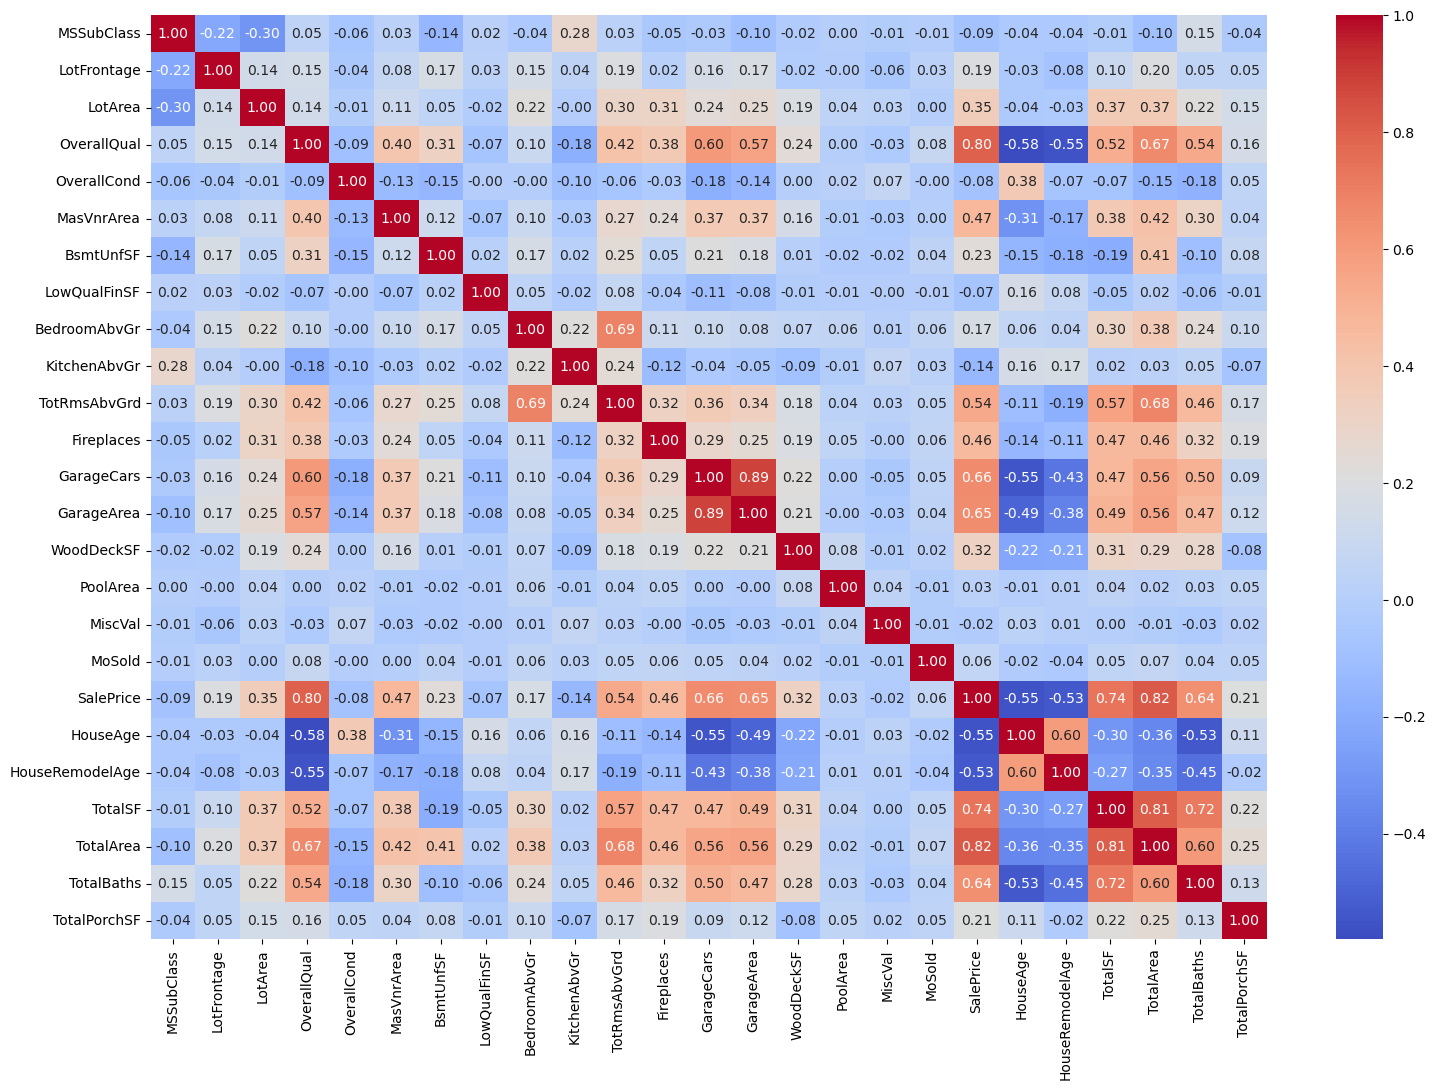

In [11]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Drop GarageArea or GarageCars because they have high correlation and the same correlation value.

In [12]:
# Drop 'GarageArea' because it has less correlation than 'GarageCars' to 'SalePrice'
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

### Variance Stabilization

<Axes: xlabel='SalePrice', ylabel='Count'>

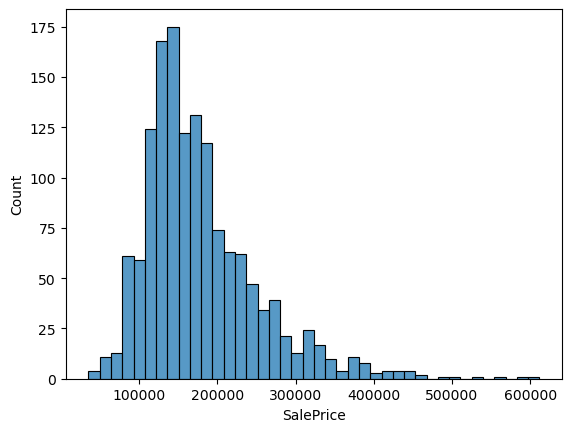

In [13]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

Because the histogram is right skewed in SalePrice, transform the SalePrice column to fix target data distribution before model training.

In [14]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

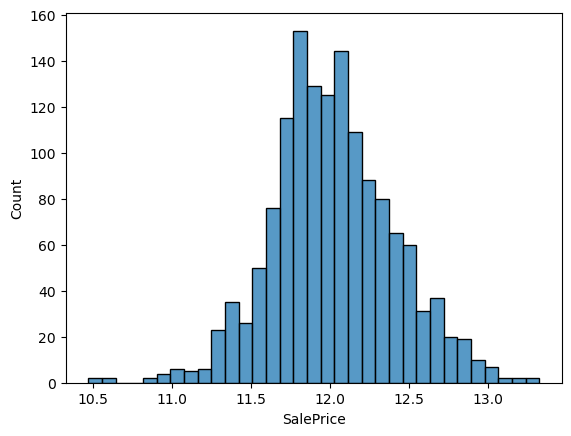

In [15]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

After using the log(1+x) function, the distribution becomes more symmetrical and closer to normal.